In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading dataset from github**

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
column_names = list(df.columns.values)
df.head()


In [3]:
X = df.iloc[:][:]
y = breast_cancer["target"]
dict_bnb = {}
dict_mnb = {}
dict_gnb = {}
dict_dtr = {}
RocAucbnb = {}
RocAucmnb = {}
RocAucgnb = {}
RocAucdtr = {}

In [4]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns

  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Pos','False Pos','False Neg','True neg']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [5]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### Classification using BernoulliNB Naive Bayes

In [6]:
def FBouBernoulli(split, alpha_value = 1.0, binarize_value = 0.0, fit_prior_value = False):
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  #scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  #scaler.fit_transform(X_train)
  #scaler.transform(X_test)
  classifier = BernoulliNB(alpha = alpha_value, binarize = binarize_value, fit_prior = fit_prior_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value) + " binarize: " + str(binarize_value) + " fit_prior: " +str(fit_prior_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_bnb:
    dict_bnb[str(split)] = max(accuracy, dict_bnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_bnb[str(split)]:
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_bnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)


Train-test split: 0.2
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


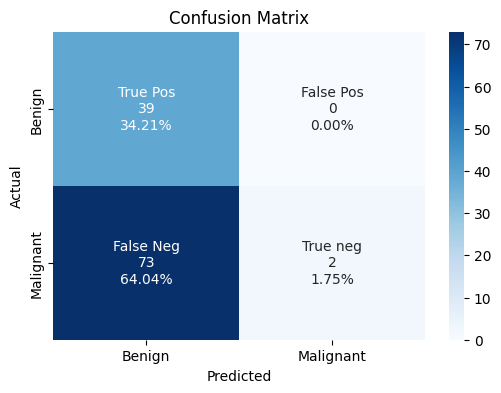

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        39
           1       1.00      0.03      0.05        75

    accuracy                           0.36       114
   macro avg       0.67      0.51      0.28       114
weighted avg       0.78      0.36      0.21       114

Train-test split: 0.2
value: alpha: 2.8 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


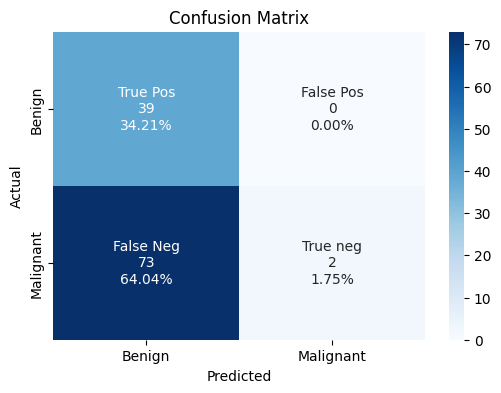

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        39
           1       1.00      0.03      0.05        75

    accuracy                           0.36       114
   macro avg       0.67      0.51      0.28       114
weighted avg       0.78      0.36      0.21       114

Train-test split: 0.2
value: alpha: 2.0 binarize: 2.8 fit_prior: False
**********************************************
Confusion Matrix : 


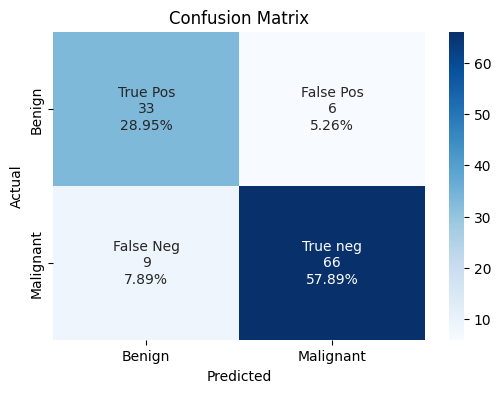

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.92      0.88      0.90        75

    accuracy                           0.87       114
   macro avg       0.85      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114

Train-test split: 0.2
value: alpha: 3.0 binarize: 3.3 fit_prior: True
**********************************************
Confusion Matrix : 


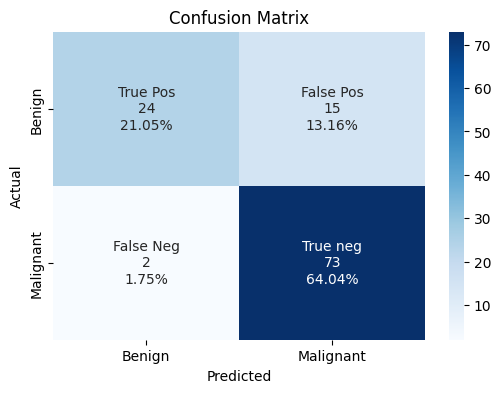

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        39
           1       0.83      0.97      0.90        75

    accuracy                           0.85       114
   macro avg       0.88      0.79      0.82       114
weighted avg       0.86      0.85      0.84       114



In [7]:
## Train-Test split 0.2
FBouBernoulli(0.2)
FBouBernoulli(0.2, 2.8)
FBouBernoulli(0.2, 2.0, 2.8)
FBouBernoulli(0.2, 3.0, 3.3, True)

Train-test split: 0.3
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


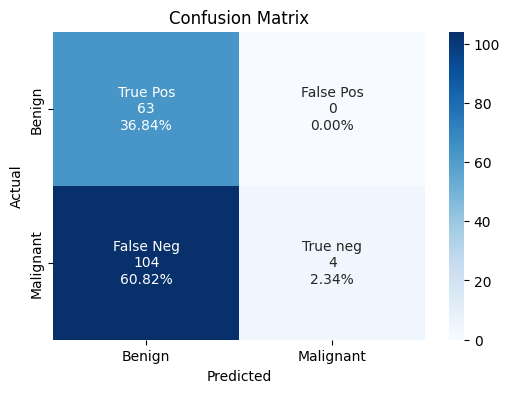

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        63
           1       1.00      0.04      0.07       108

    accuracy                           0.39       171
   macro avg       0.69      0.52      0.31       171
weighted avg       0.77      0.39      0.25       171

Train-test split: 0.3
value: alpha: 1.0 binarize: 2.8 fit_prior: False
**********************************************
Confusion Matrix : 


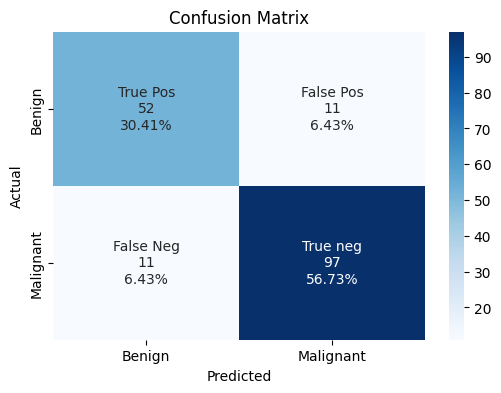

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        63
           1       0.90      0.90      0.90       108

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171

Train-test split: 0.3
value: alpha: 1.0 binarize: 2.8 fit_prior: True
**********************************************
Confusion Matrix : 


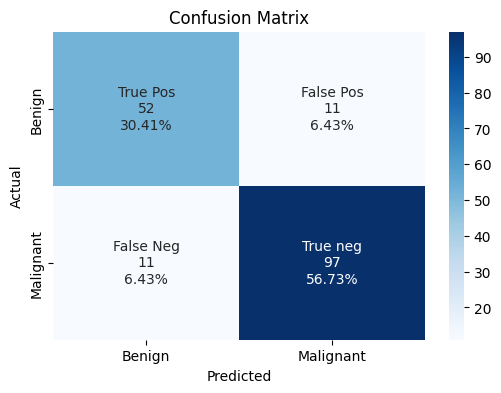

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        63
           1       0.90      0.90      0.90       108

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171



In [8]:
## Train-Test split 0.3
FBouBernoulli(0.3)
FBouBernoulli(0.3, 1.0, 2.8)
FBouBernoulli(0.3, 1.0, 2.8, True)

Train-test split: 0.4
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


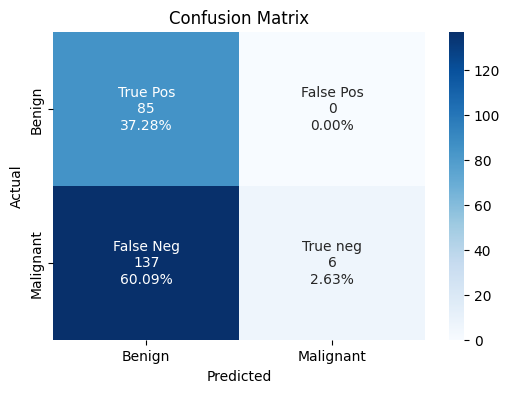

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        85
           1       1.00      0.04      0.08       143

    accuracy                           0.40       228
   macro avg       0.69      0.52      0.32       228
weighted avg       0.77      0.40      0.26       228

Train-test split: 0.4
value: alpha: 1.0 binarize: 2.8 fit_prior: False
**********************************************
Confusion Matrix : 


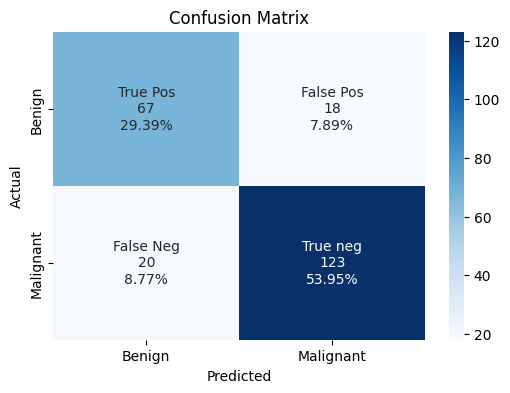

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        85
           1       0.87      0.86      0.87       143

    accuracy                           0.83       228
   macro avg       0.82      0.82      0.82       228
weighted avg       0.83      0.83      0.83       228

Train-test split: 0.4
value: alpha: 1.0 binarize: 2.8 fit_prior: True
**********************************************
Confusion Matrix : 


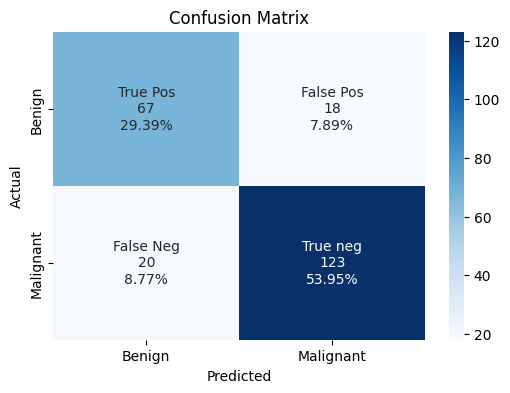

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        85
           1       0.87      0.86      0.87       143

    accuracy                           0.83       228
   macro avg       0.82      0.82      0.82       228
weighted avg       0.83      0.83      0.83       228



In [9]:
## Train-Test split 0.4
FBouBernoulli(0.4)
FBouBernoulli(0.4, 1.0, 2.8)
FBouBernoulli(0.4, 1.0, 2.8, True)

Train-test split: 0.5
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


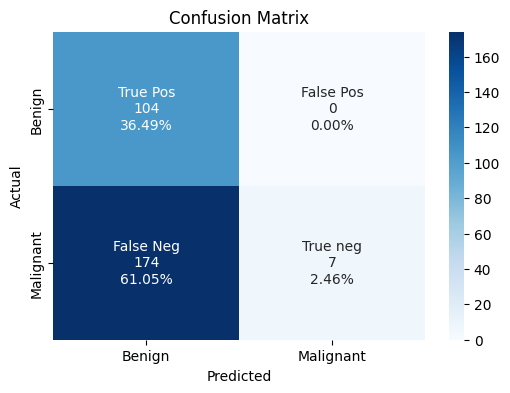

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       104
           1       1.00      0.04      0.07       181

    accuracy                           0.39       285
   macro avg       0.69      0.52      0.31       285
weighted avg       0.77      0.39      0.25       285

Train-test split: 0.5
value: alpha: 1.0 binarize: 2.9 fit_prior: False
**********************************************
Confusion Matrix : 


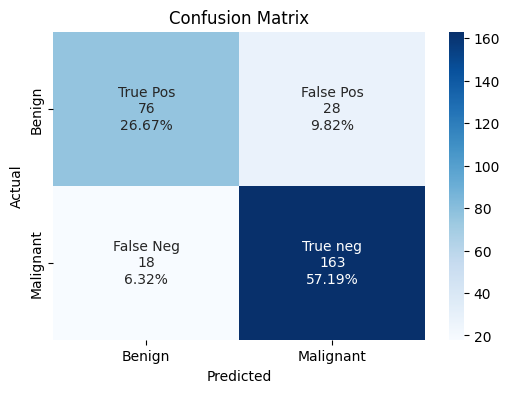

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       104
           1       0.85      0.90      0.88       181

    accuracy                           0.84       285
   macro avg       0.83      0.82      0.82       285
weighted avg       0.84      0.84      0.84       285

Train-test split: 0.5
value: alpha: 1.0 binarize: 2.9 fit_prior: True
**********************************************
Confusion Matrix : 


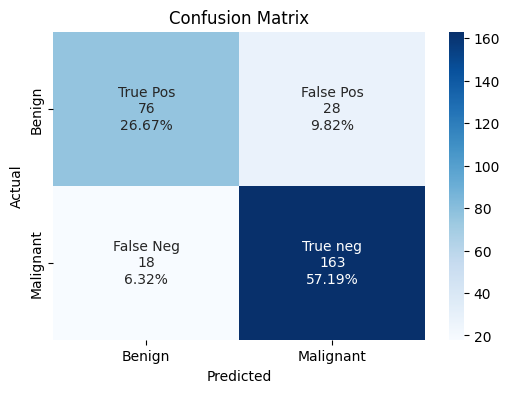

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       104
           1       0.85      0.90      0.88       181

    accuracy                           0.84       285
   macro avg       0.83      0.82      0.82       285
weighted avg       0.84      0.84      0.84       285



In [10]:
## Train-Test split 0.5
FBouBernoulli(0.5)
FBouBernoulli(0.5, 1.0, 2.9)
FBouBernoulli(0.5, 1.0, 2.9, True)

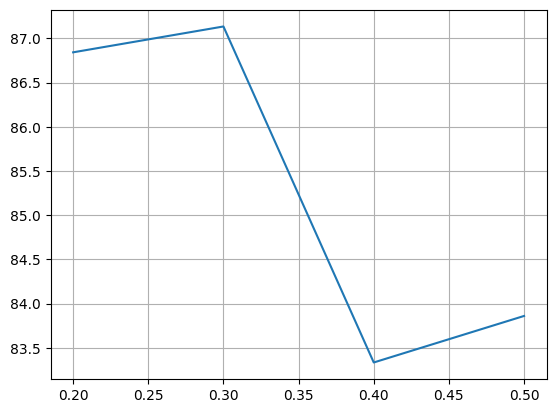

In [11]:
x_points = [float(key) for key in dict_bnb]
y_points = [i*100 for i in dict_bnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

## Classification using Multinomial Naive Bayes

Train-test split: 0.2
value: alpha: 1.0
**********************************************
Confusion Matrix : 


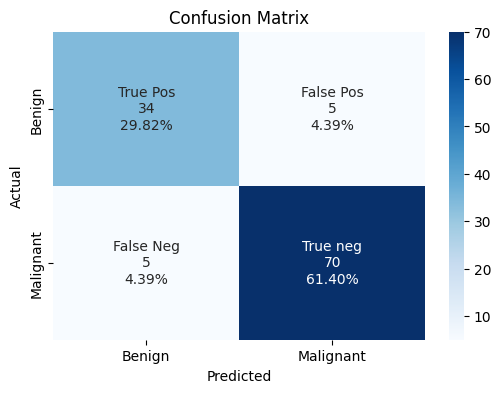

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.93      0.93      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix : 


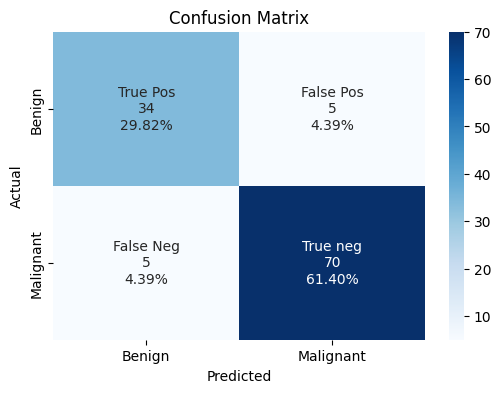

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.93      0.93      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Train-test split: 0.2
value: alpha: 1.8
**********************************************
Confusion Matrix : 


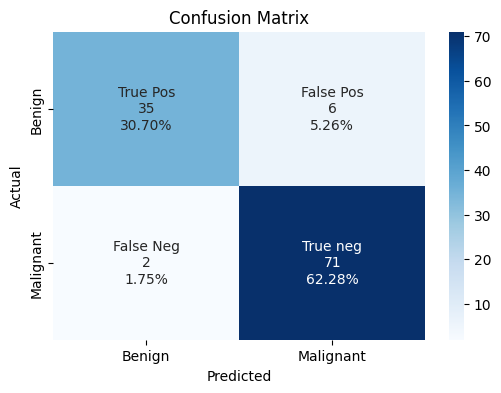

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.92      0.97      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix : 


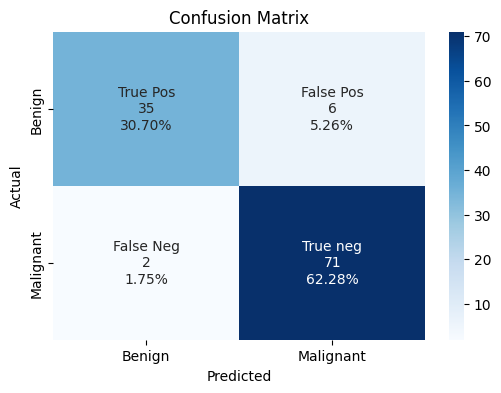

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.92      0.97      0.95        73

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [12]:
def FMultinomial(split, alpha_value = 1.0):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = MultinomialNB(alpha = alpha_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_mnb:
    dict_mnb[str(split)] = max(accuracy, dict_mnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_mnb[str(split)]:
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)
  reports(y_test, y_pred)

## Train-Test split 0.2
FMultinomial(0.2)
FMultinomial(0.2, 1.8)
#92, 91, 89, 91

Train-test split: 0.3
value: alpha: 1.0
**********************************************
Confusion Matrix : 


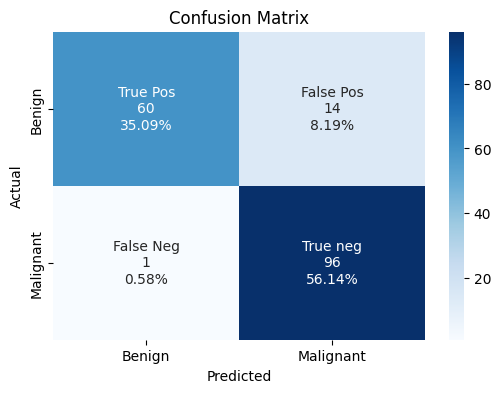

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        74
           1       0.87      0.99      0.93        97

    accuracy                           0.91       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171

Confusion Matrix : 


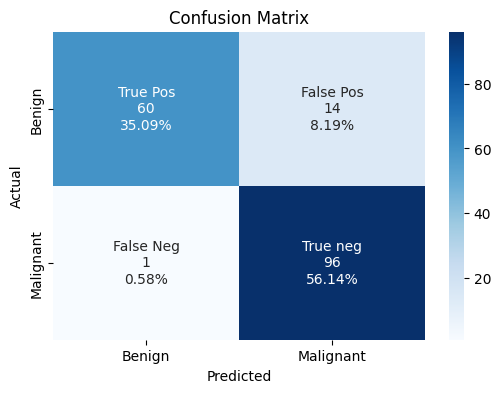

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        74
           1       0.87      0.99      0.93        97

    accuracy                           0.91       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171

Train-test split: 0.3
value: alpha: 2.5
**********************************************
Confusion Matrix : 


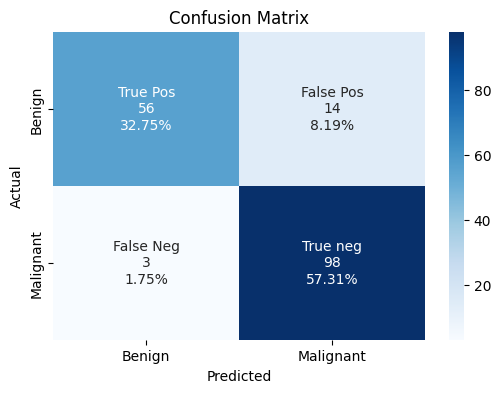

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        70
           1       0.88      0.97      0.92       101

    accuracy                           0.90       171
   macro avg       0.91      0.89      0.89       171
weighted avg       0.91      0.90      0.90       171

Confusion Matrix : 


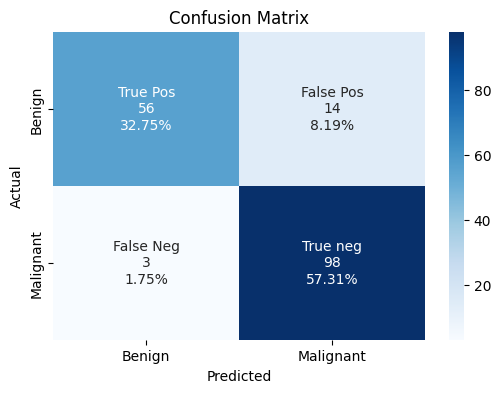

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        70
           1       0.88      0.97      0.92       101

    accuracy                           0.90       171
   macro avg       0.91      0.89      0.89       171
weighted avg       0.91      0.90      0.90       171



In [13]:
## Train-Test split 0.3
FMultinomial(0.3)
FMultinomial(0.3, 2.5)

Train-test split: 0.4
value: alpha: 1.0
**********************************************
Confusion Matrix : 


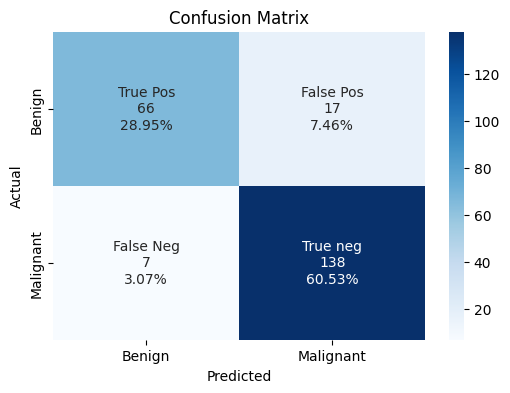

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        83
           1       0.89      0.95      0.92       145

    accuracy                           0.89       228
   macro avg       0.90      0.87      0.88       228
weighted avg       0.90      0.89      0.89       228

Confusion Matrix : 


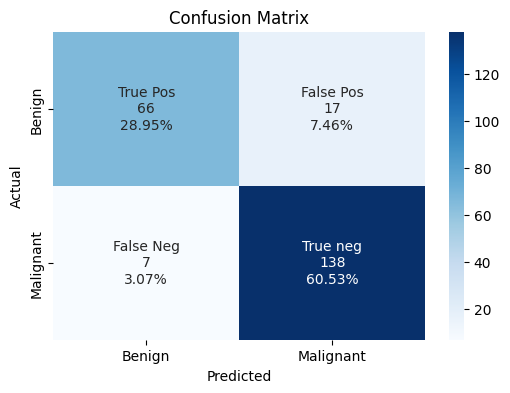

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        83
           1       0.89      0.95      0.92       145

    accuracy                           0.89       228
   macro avg       0.90      0.87      0.88       228
weighted avg       0.90      0.89      0.89       228

Train-test split: 0.4
value: alpha: 2.1
**********************************************
Confusion Matrix : 


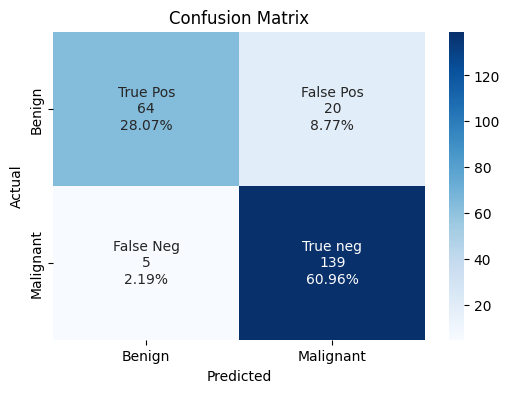

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        84
           1       0.87      0.97      0.92       144

    accuracy                           0.89       228
   macro avg       0.90      0.86      0.88       228
weighted avg       0.89      0.89      0.89       228

Confusion Matrix : 


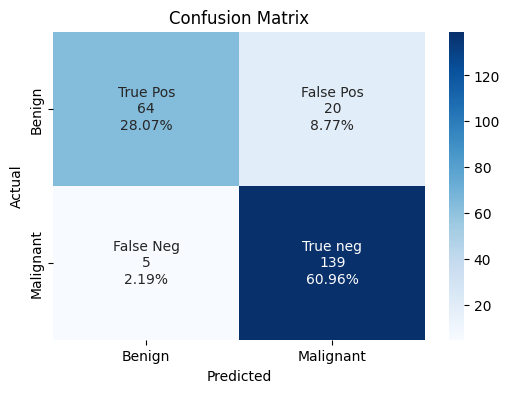

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        84
           1       0.87      0.97      0.92       144

    accuracy                           0.89       228
   macro avg       0.90      0.86      0.88       228
weighted avg       0.89      0.89      0.89       228



In [14]:
## Train-Test split 0.4
FMultinomial(0.4)
FMultinomial(0.4, 2.1)

Train-test split: 0.5
value: alpha: 1.0
**********************************************
Confusion Matrix : 


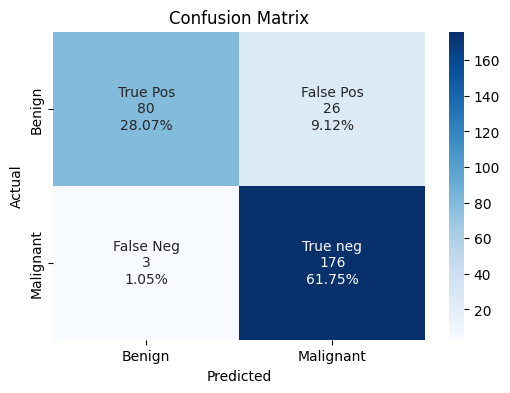

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       106
           1       0.87      0.98      0.92       179

    accuracy                           0.90       285
   macro avg       0.92      0.87      0.89       285
weighted avg       0.91      0.90      0.90       285

Confusion Matrix : 


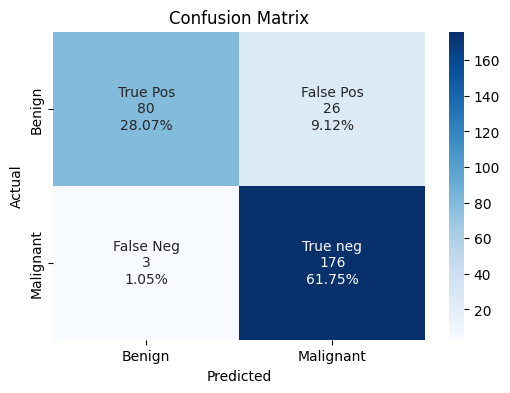

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       106
           1       0.87      0.98      0.92       179

    accuracy                           0.90       285
   macro avg       0.92      0.87      0.89       285
weighted avg       0.91      0.90      0.90       285

Train-test split: 0.5
value: alpha: 1.8
**********************************************
Confusion Matrix : 


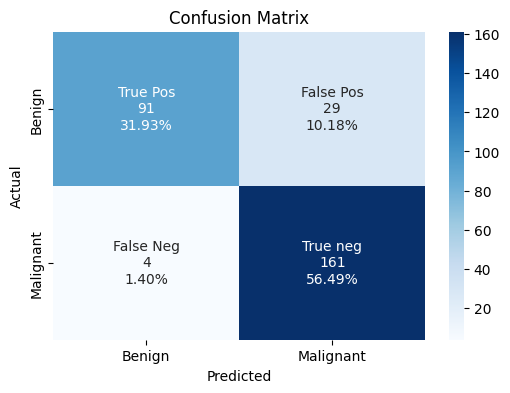

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       120
           1       0.85      0.98      0.91       165

    accuracy                           0.88       285
   macro avg       0.90      0.87      0.88       285
weighted avg       0.89      0.88      0.88       285

Confusion Matrix : 


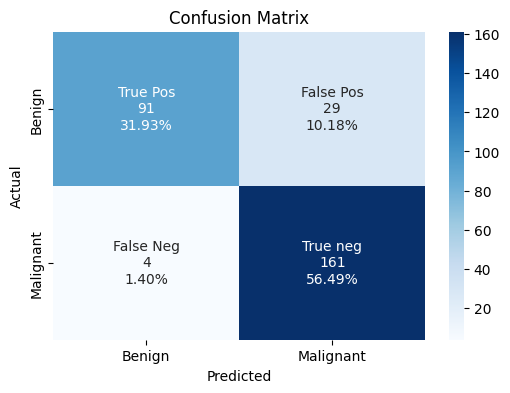

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       120
           1       0.85      0.98      0.91       165

    accuracy                           0.88       285
   macro avg       0.90      0.87      0.88       285
weighted avg       0.89      0.88      0.88       285



In [15]:
## Train-Test split 0.5
FMultinomial(0.5)
FMultinomial(0.5, 1.8)

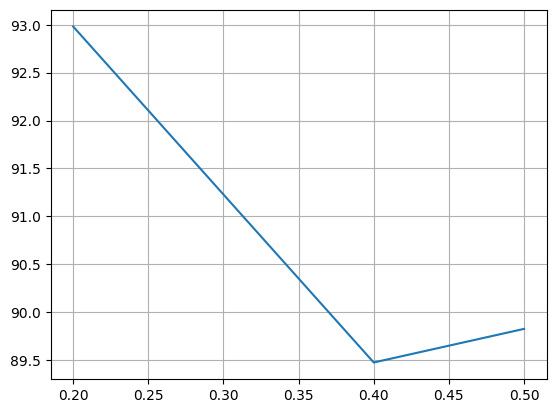

In [16]:
x_points = [float(key) for key in dict_mnb]
y_points = [i*100 for i in dict_mnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Guassian Naive Bayes**

Train-test split: 0.2
**********************************************
Confusion Matrix : 


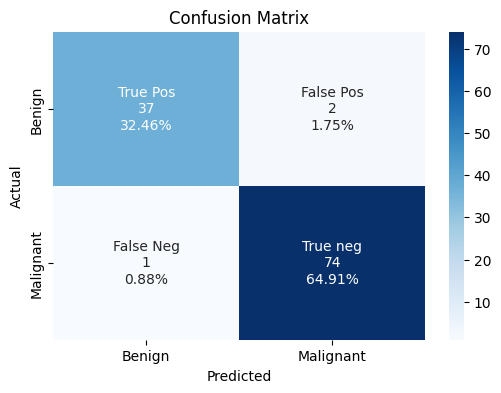

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
def FGaussian(split):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_gnb):
    dict_gnb[str(split)] = max(accuracy, dict_gnb[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_gnb[str(split)] = accuracy
    RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}

## Train-Test split 0.2
FGaussian(0.2)
# 94, 97, 94, 96,

Train-test split: 0.3
**********************************************
Confusion Matrix : 


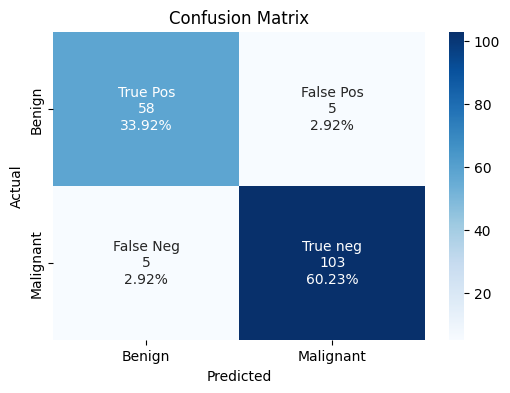

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.95      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [18]:
## Train-Test split 0.3
FGaussian(0.3)


Train-test split: 0.4
**********************************************
Confusion Matrix : 


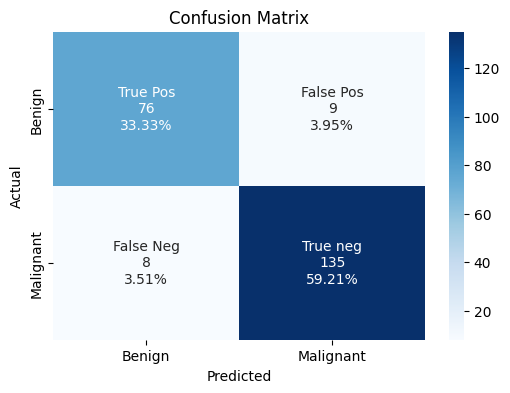

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        85
           1       0.94      0.94      0.94       143

    accuracy                           0.93       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [19]:
## Train-Test split 0.4
FGaussian(0.4)

Train-test split: 0.5
**********************************************
Confusion Matrix : 


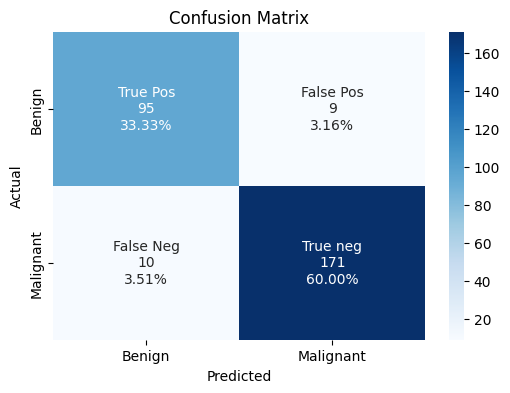

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       104
           1       0.95      0.94      0.95       181

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285



In [20]:
## Train-Test split 0.5
FGaussian(0.5)

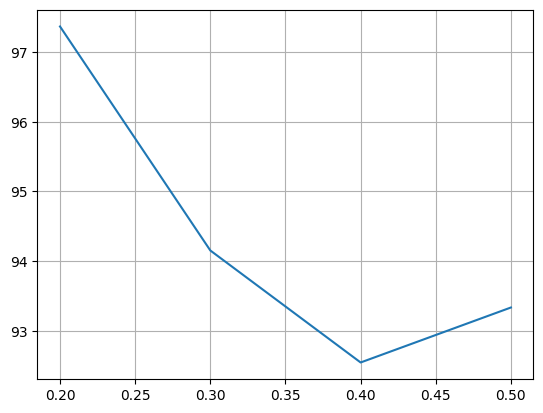

In [21]:
x_points = [float(key) for key in dict_gnb]
y_points = [i*100 for i in dict_gnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Decision Tree**

In [22]:
def decision_tree(split, criterion_value):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)

  classifier = DecisionTreeClassifier(criterion = criterion_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("Value: Entropy: " + criterion_value)
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_dtr):
    dict_dtr[str(split)] = max(accuracy, dict_dtr[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_dtr[str(split)] = accuracy
    if(str(split) == '0.3'):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
      
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(classifier,
                    feature_names=column_names,
                    class_names=['outcome1', 'outcome2'],
                    filled=True)
  


Train-test split: 0.2
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


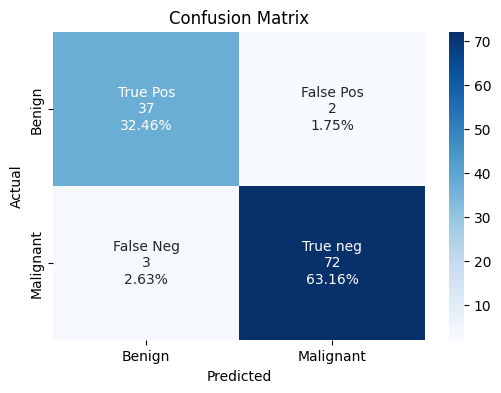

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



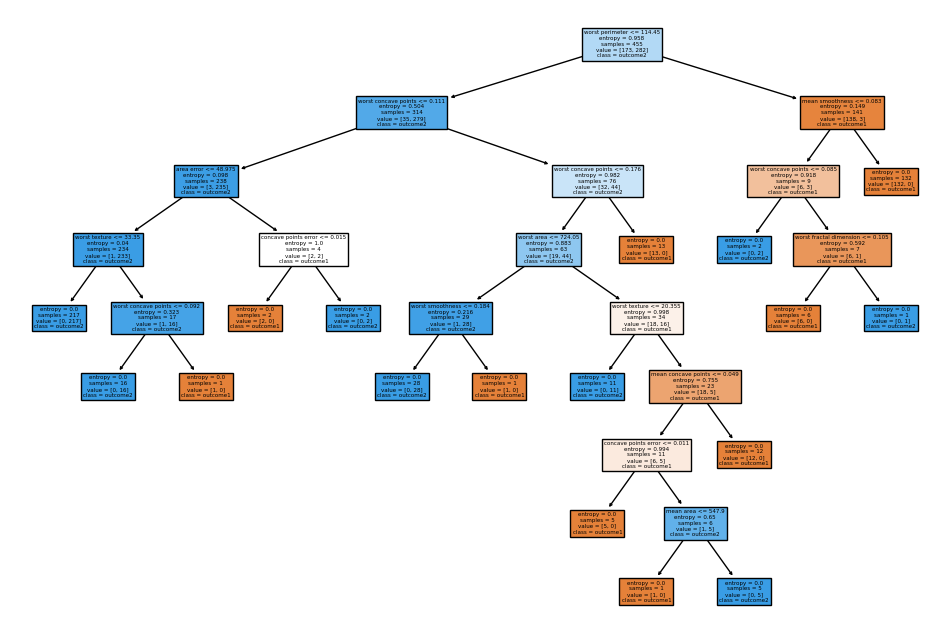

In [23]:
decision_tree(0.2, 'entropy')

Train-test split: 0.2
Value: Entropy: gini
**********************************************
Confusion Matrix : 


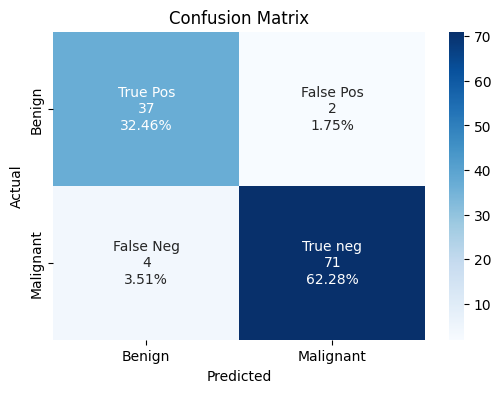

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.97      0.95      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



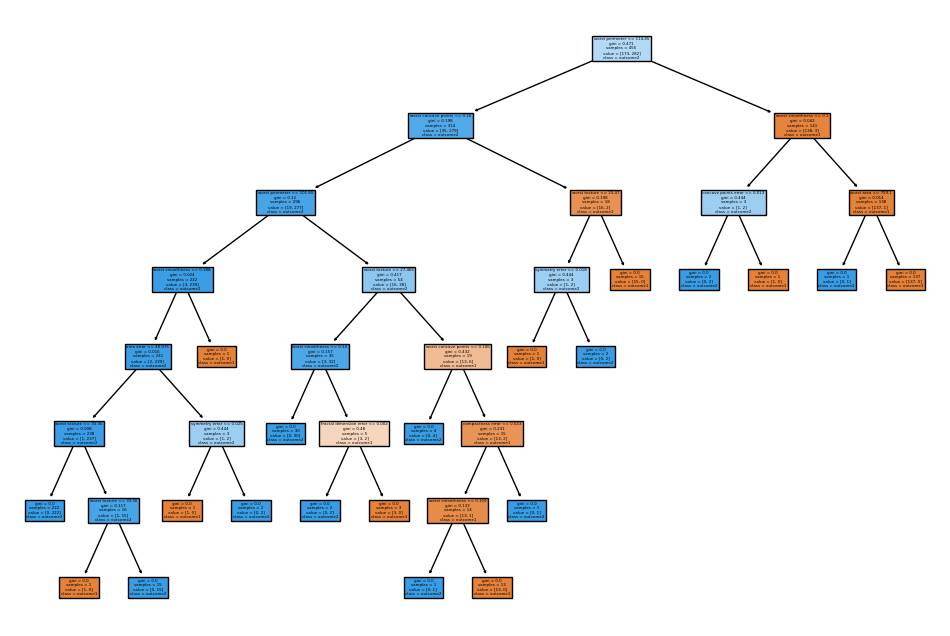

In [24]:
decision_tree(0.2, 'gini')

Train-test split: 0.3
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


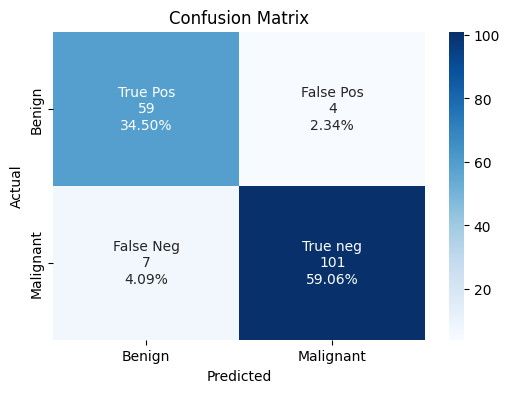

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



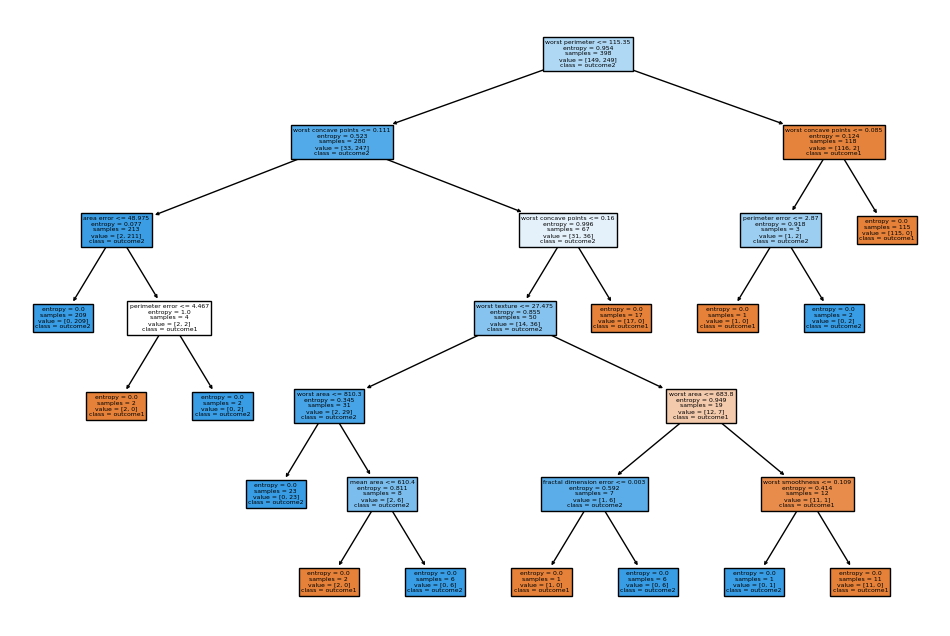

In [25]:
decision_tree(0.3, 'entropy')

Train-test split: 0.3
Value: Entropy: gini
**********************************************
Confusion Matrix : 


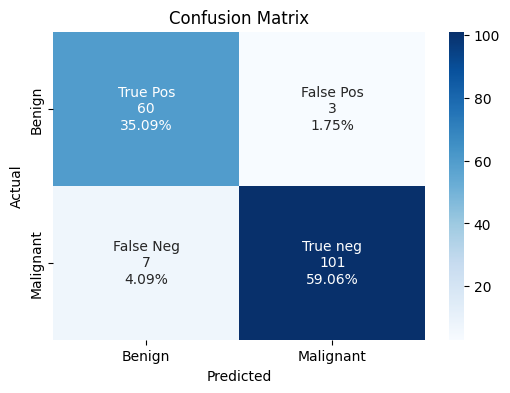

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



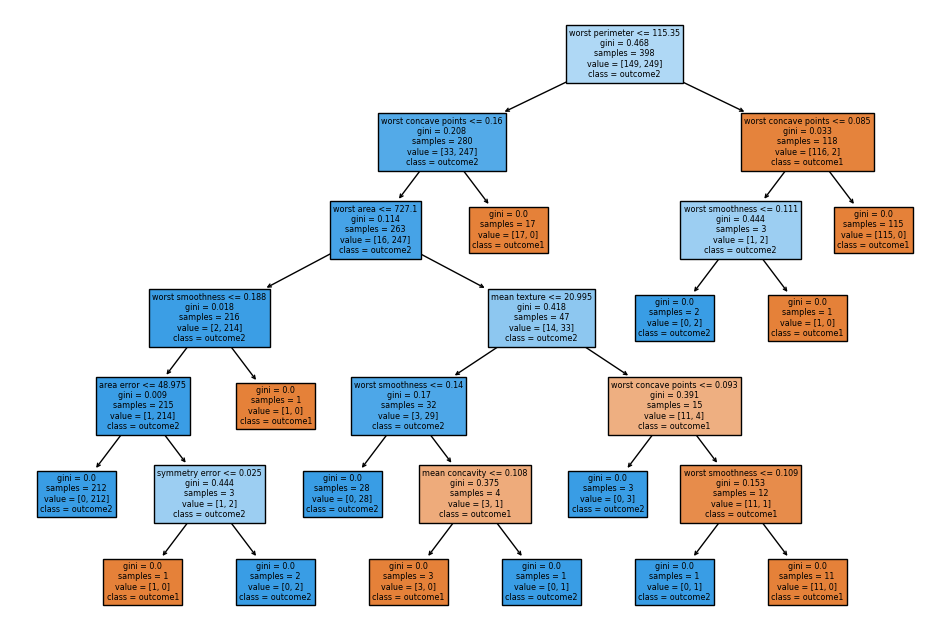

In [26]:

decision_tree(0.3, 'gini')

Train-test split: 0.4
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


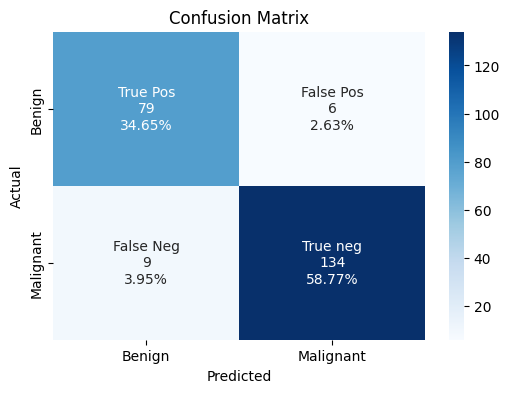

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        85
           1       0.96      0.94      0.95       143

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



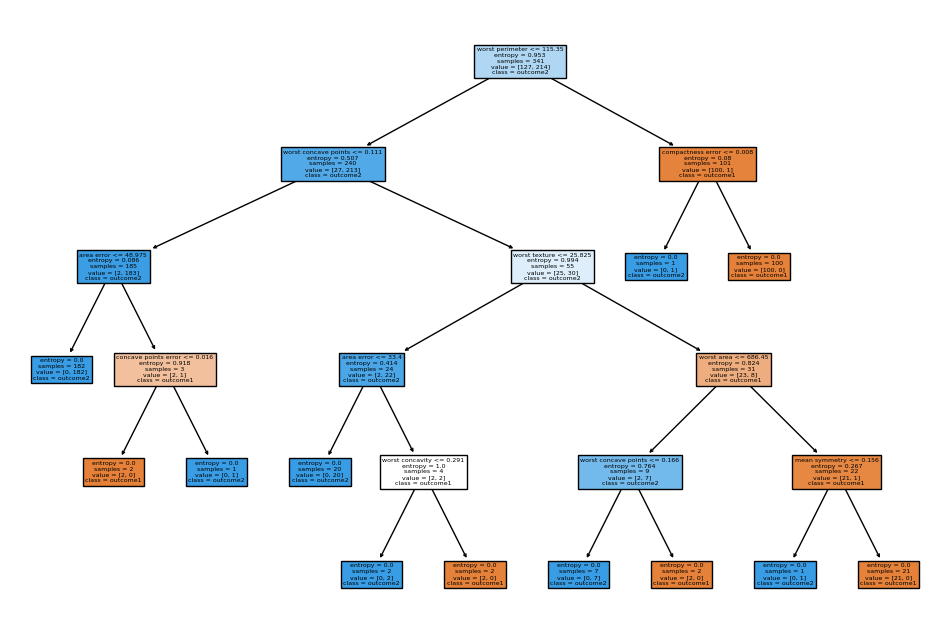

In [27]:
decision_tree(0.4, 'entropy')

Train-test split: 0.4
Value: Entropy: gini
**********************************************
Confusion Matrix : 


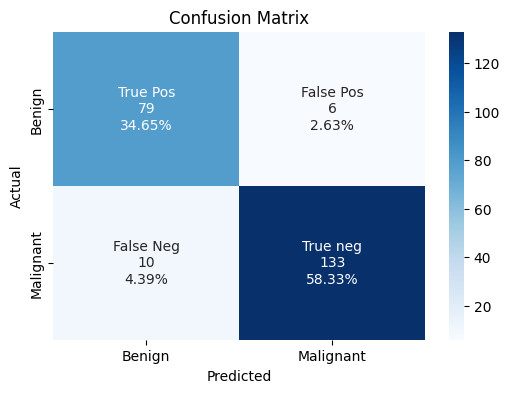

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        85
           1       0.96      0.93      0.94       143

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



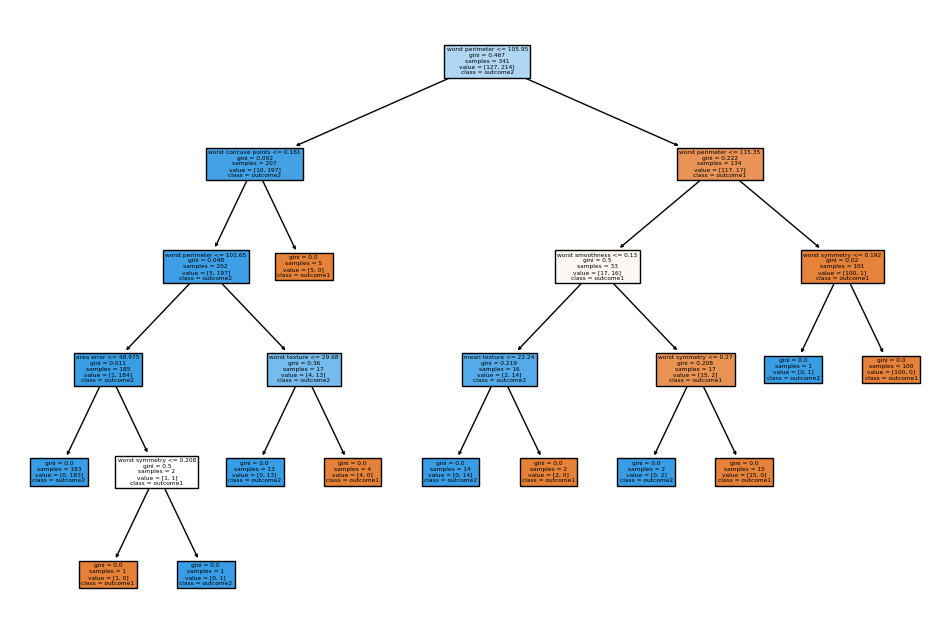

In [28]:

decision_tree(0.4, 'gini')

Train-test split: 0.5
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


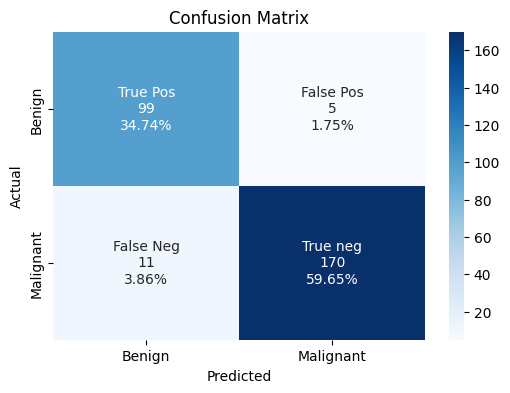

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       104
           1       0.97      0.94      0.96       181

    accuracy                           0.94       285
   macro avg       0.94      0.95      0.94       285
weighted avg       0.95      0.94      0.94       285



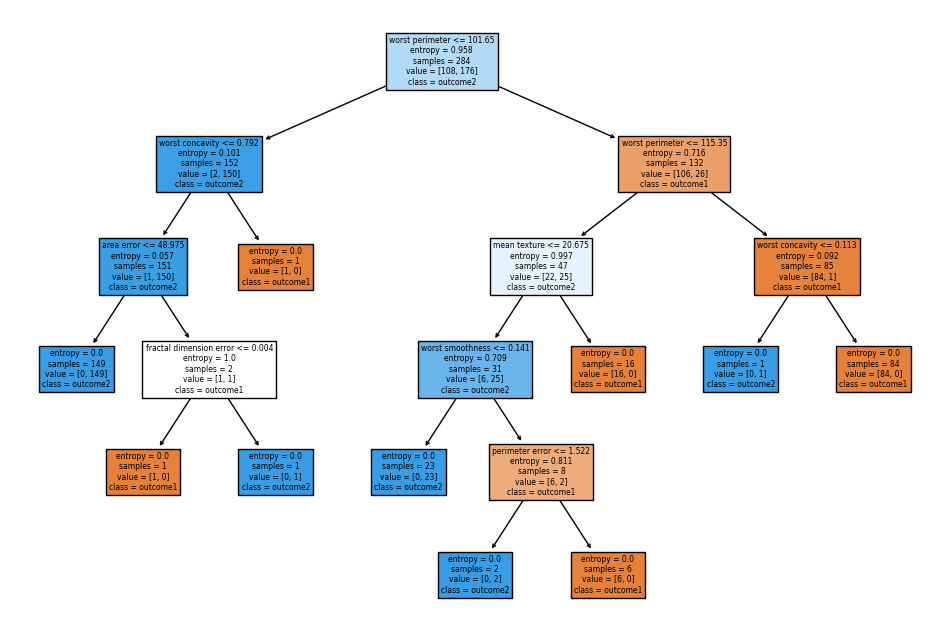

In [29]:
decision_tree(0.5, 'entropy')

Train-test split: 0.5
Value: Entropy: gini
**********************************************
Confusion Matrix : 


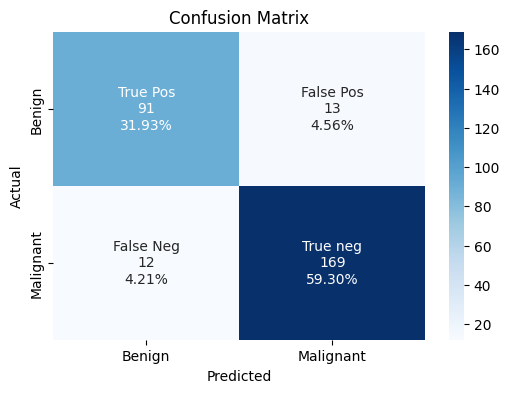

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.93      0.93      0.93       181

    accuracy                           0.91       285
   macro avg       0.91      0.90      0.91       285
weighted avg       0.91      0.91      0.91       285



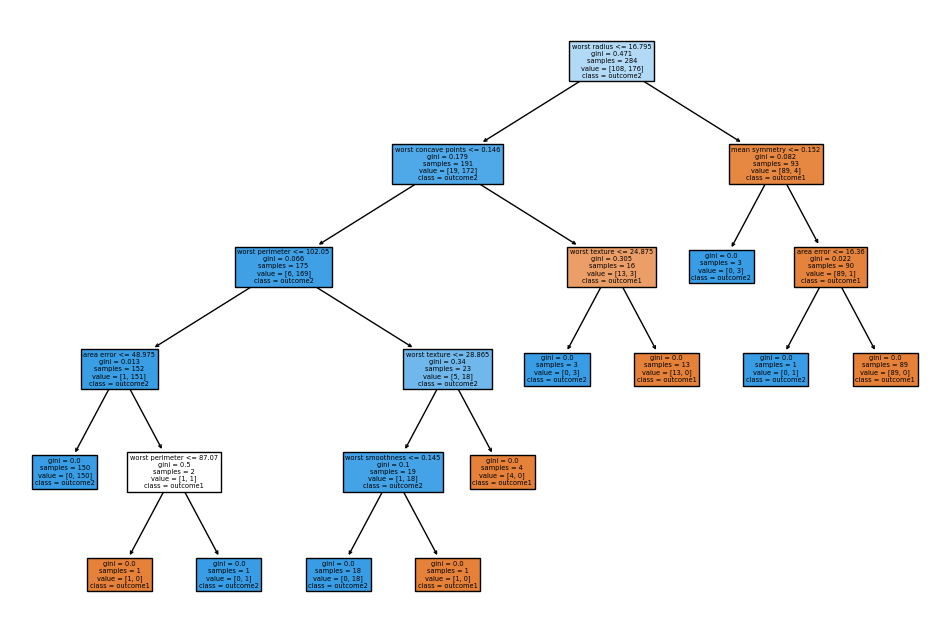

In [30]:
decision_tree(0.5, 'gini')

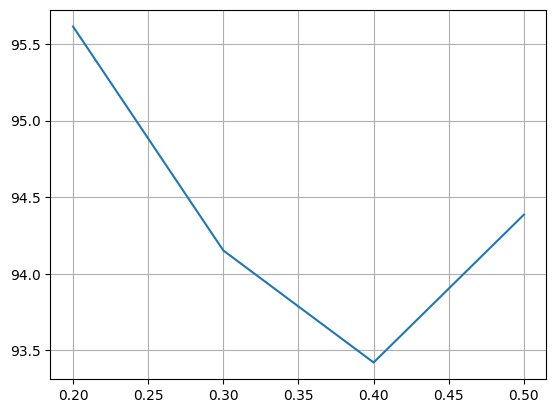

In [31]:
x_points = [float(key) for key in dict_dtr]
y_points = [i*100 for i in dict_dtr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

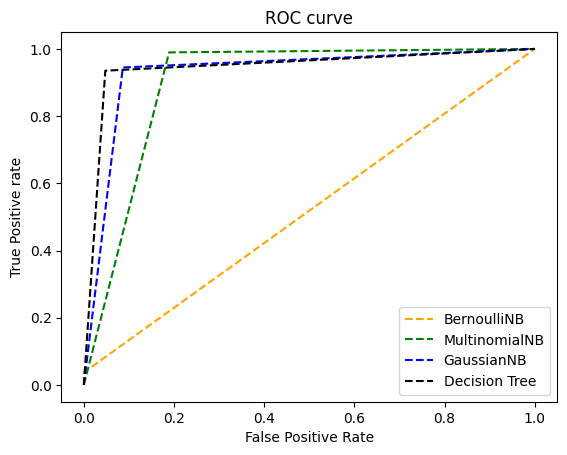

In [32]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucbnb['max']['y_test'], RocAucbnb['max']['y_pred'], pos_label=1)
    fpr4, tpr4, _3 = metrics.roc_curve(RocAucmnb['max']['y_test'], RocAucmnb['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucgnb['max']['y_test'], RocAucgnb['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucdtr['max']['y_test'], RocAucdtr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='BernoulliNB')
    plt.plot(fpr4, tpr4, linestyle='--',color='green', label='MultinomialNB')
    plt.plot(fpr2, tpr2, linestyle='--', color='blue', label= 'GaussianNB')
    plt.plot(fpr3, tpr3, linestyle='--', color='black', label= 'Decision Tree')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()